Dependencies

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Load DataSet

In [4]:
df = pd.read_excel('C:/Users/Administrator/Desktop/DS Projects/EDA/Project_2_Online_Retail_Sales/online_retail_II.xlsx')

Understand Data

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Data Cleaning

In [7]:
df.dropna(subset=['Customer ID'], inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df_sales = df[~df['Invoice'].astype(str).str.startswith('C')]
df_cancelled = df[df['Invoice'].astype(str).str.startswith('C')]

In [10]:
df_sales = df_sales[df_sales['Quantity'] > 0]
df_sales = df_sales[df_sales['Price'] > 0]

In [11]:
df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'])

df_sales['InvoiceYearMonth'] = df_sales['InvoiceDate'].dt.to_period('M')
df_sales['InvoiceHour'] = df_sales['InvoiceDate'].dt.hour
df_sales['DayOfWeek'] = df_sales['InvoiceDate'].dt.day_name()
df_sales['Month'] = df_sales['InvoiceDate'].dt.month_name()
df_sales['Year'] = df_sales['InvoiceDate'].dt.year

In [12]:
df_sales['TotalPrice'] = df_sales['Quantity'] * df_sales['Price']

In [13]:
df_sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYearMonth,InvoiceHour,DayOfWeek,Month,Year,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12,7,Tuesday,December,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,7,Tuesday,December,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12,7,Tuesday,December,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12,7,Tuesday,December,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12,7,Tuesday,December,2009,30.0


EDA

General:

1) Number of unique products: 4017
2) Total number of transactions: 19213
3) Number of unique customers: 4312
4) Customer distribution by Country:
Country
United Kingdom          364233
EIRE                      8503
Germany                   7645
France                    5452
Netherlands               2728
Spain                     1228
Switzerland               1170
Belgium                   1036
Portugal                   983
Sweden                     867
Channel Islands            821
Italy                      708
Australia                  630
Cyprus                     533
Austria                    524
Greece                     512
Denmark                    418
Norway                     365
Finland                    347
United Arab Emirates       315
Unspecified                277
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
Canada  

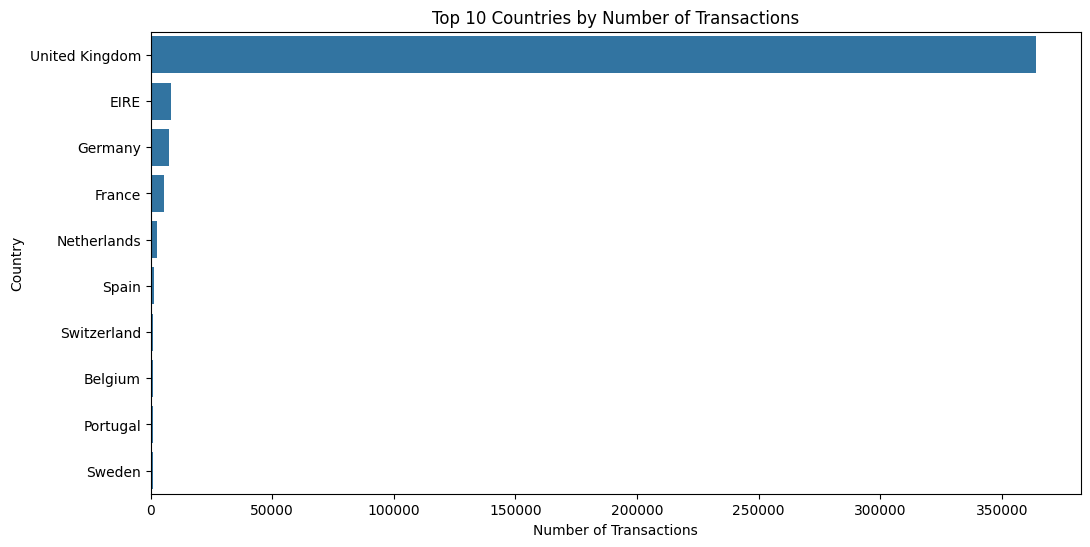

In [14]:
num_stock = df_sales['StockCode'].nunique()
print(f"1) Number of unique products: {num_stock}")

num_invoice = df_sales['Invoice'].nunique()
print(f"2) Total number of transactions: {num_invoice}")

unique_customers = df_sales['Customer ID'].nunique()
print(f"3) Number of unique customers: {unique_customers}")

country_distribution = df_sales['Country'].value_counts()
print("4) Customer distribution by Country:")
print(country_distribution)

plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df_sales, order=df_sales['Country'].value_counts().index[:10]) 
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

Product Analysis:

1) Top 10 Selling Products by Quantity:
Description
WHITE HANGING HEART T-LIGHT HOLDER    56814
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54610
BROCADE RING PURSE                    48166
PACK OF 72 RETRO SPOT CAKE CASES      45129
ASSORTED COLOUR BIRD ORNAMENT         44431
60 TEATIME FAIRY CAKE CASES           35656
PACK OF 60 PINK PAISLEY CAKE CASES    30871
JUMBO BAG RED RETROSPOT               29519
SMALL POPCORN HOLDER                  25703
BLACK AND WHITE PAISLEY FLOWER MUG    25685
Name: Quantity, dtype: int64


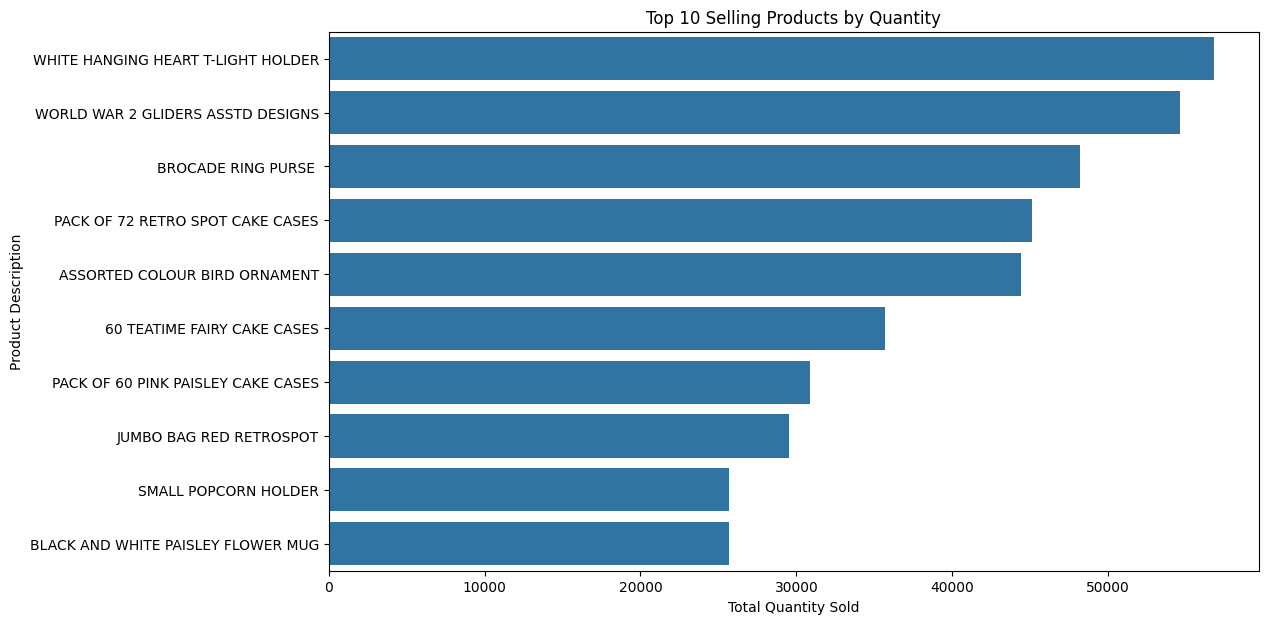

2) Top 10 Revenue Generating Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER     151339.16
REGENCY CAKESTAND 3 TIER               143727.60
Manual                                  98531.99
ASSORTED COLOUR BIRD ORNAMENT           70291.03
JUMBO BAG RED RETROSPOT                 51644.25
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40156.05
PAPER CHAIN KIT 50'S CHRISTMAS          36871.55
PARTY BUNTING                           35017.30
EDWARDIAN PARASOL NATURAL               34044.75
Name: TotalPrice, dtype: float64


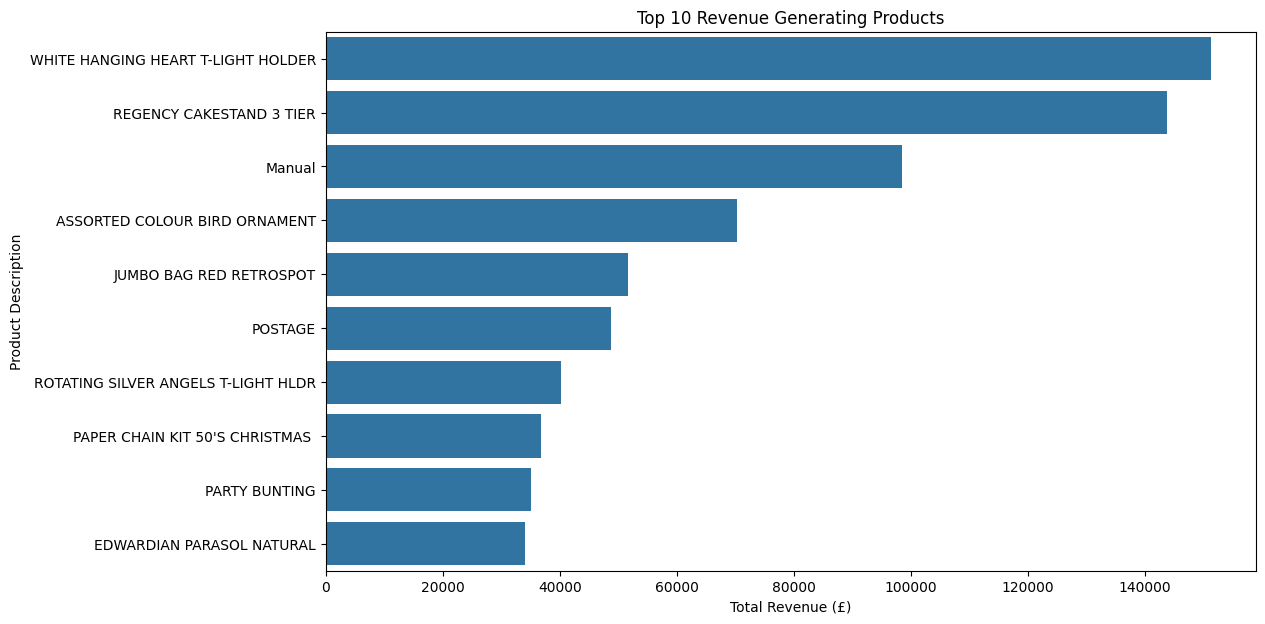

3) Products with Negative Unit Prices:
Empty DataFrame
Columns: [StockCode, Description, Price]
Index: []


In [15]:
top_10_by_quantity = df_sales.groupby('Description')['Quantity'].sum().nlargest(10)
print("1) Top 10 Selling Products by Quantity:")
print(top_10_by_quantity)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_by_quantity.values, y=top_10_by_quantity.index)
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()


top_10_by_revenue = df_sales.groupby('Description')['TotalPrice'].sum().nlargest(10)
print("2) Top 10 Revenue Generating Products:")
print(top_10_by_revenue)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_by_revenue.values, y=top_10_by_revenue.index)
plt.title('Top 10 Revenue Generating Products')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Product Description')
plt.show()


problematic_prices = df_sales[df_sales['Price'] <= 0]
print("3) Products with Negative Unit Prices:")
print(problematic_prices[['StockCode', 'Description', 'Price']].head())

Customer Analysis:

1) Top 10 Customers by Quantity Purchased:
Customer ID
13902.0    220600
14646.0    170278
13694.0    125893
18102.0    124216
14156.0    108105
14277.0     87830
13687.0     87167
17940.0     75825
14911.0     69709
16754.0     63551
Name: Quantity, dtype: int64
2) Distribution of Number of Purchases per Customer (first 10):
Customer ID
12346.0    11
12347.0     2
12348.0     1
12349.0     3
12351.0     1
12352.0     2
12353.0     1
12355.0     1
12356.0     3
12357.0     2
Name: Invoice, dtype: int64


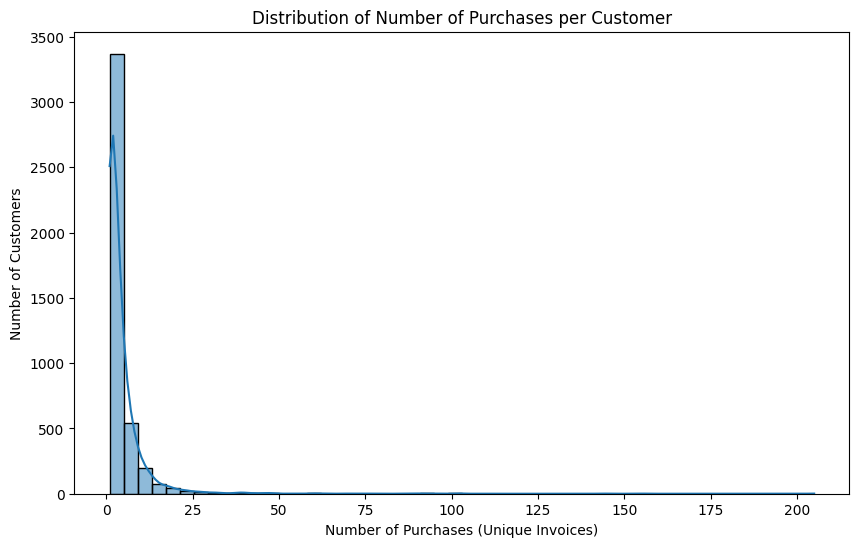

Top 10 Loyal Customers by Total Spending:
Customer ID
18102.0    349164.35
14646.0    248396.50
14156.0    196549.74
14911.0    152121.22
13694.0    131443.19
17511.0     84541.17
15061.0     83284.38
16684.0     80489.21
16754.0     65500.07
17949.0     60117.60
Name: TotalPrice, dtype: float64


In [16]:
top_customers_by_quantity = df_sales.groupby('Customer ID')['Quantity'].sum().nlargest(10)
print("1) Top 10 Customers by Quantity Purchased:")
print(top_customers_by_quantity)

purchases_per_customer = df_sales.groupby('Customer ID')['Invoice'].nunique()
print("2) Distribution of Number of Purchases per Customer (first 10):")
print(purchases_per_customer.head(10))

plt.figure(figsize=(10, 6))
sns.histplot(purchases_per_customer, bins=50, kde=True) 
plt.title('Distribution of Number of Purchases per Customer')
plt.xlabel('Number of Purchases (Unique Invoices)')
plt.ylabel('Number of Customers')
plt.show()


# Loyal customers can be extracted by high frequency or high total spending.
loyal_customers_by_revenue = df_sales.groupby('Customer ID')['TotalPrice'].sum().nlargest(10)
print("Top 10 Loyal Customers by Total Spending:")
print(loyal_customers_by_revenue)

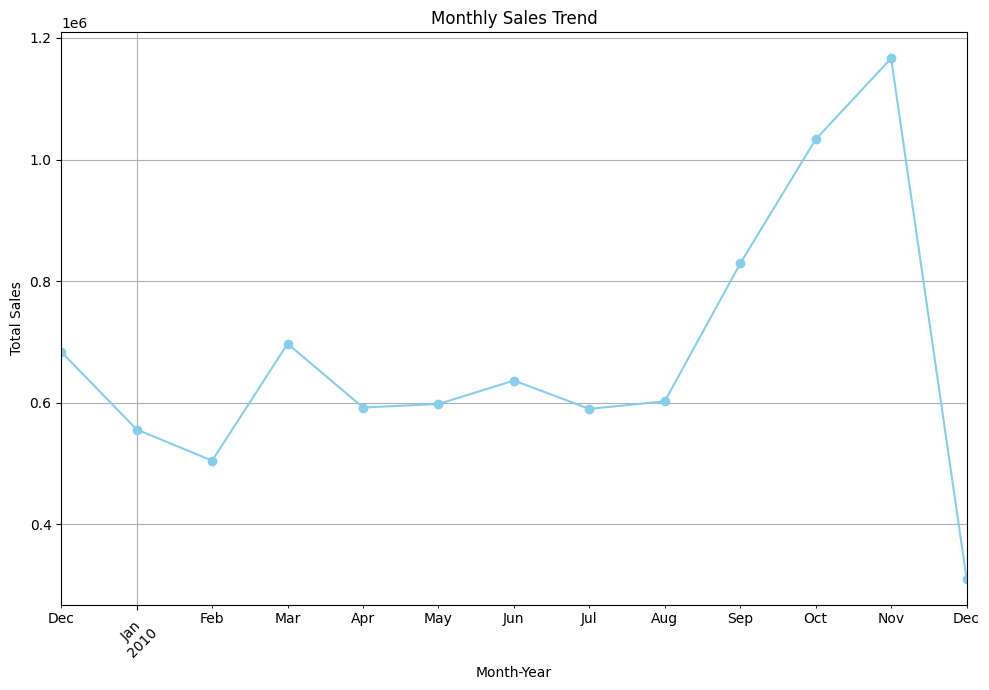

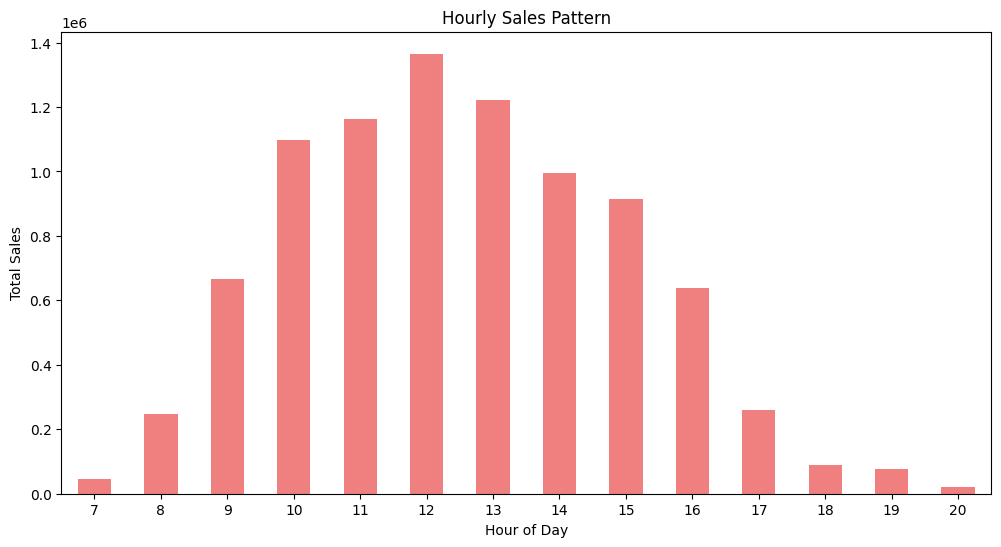

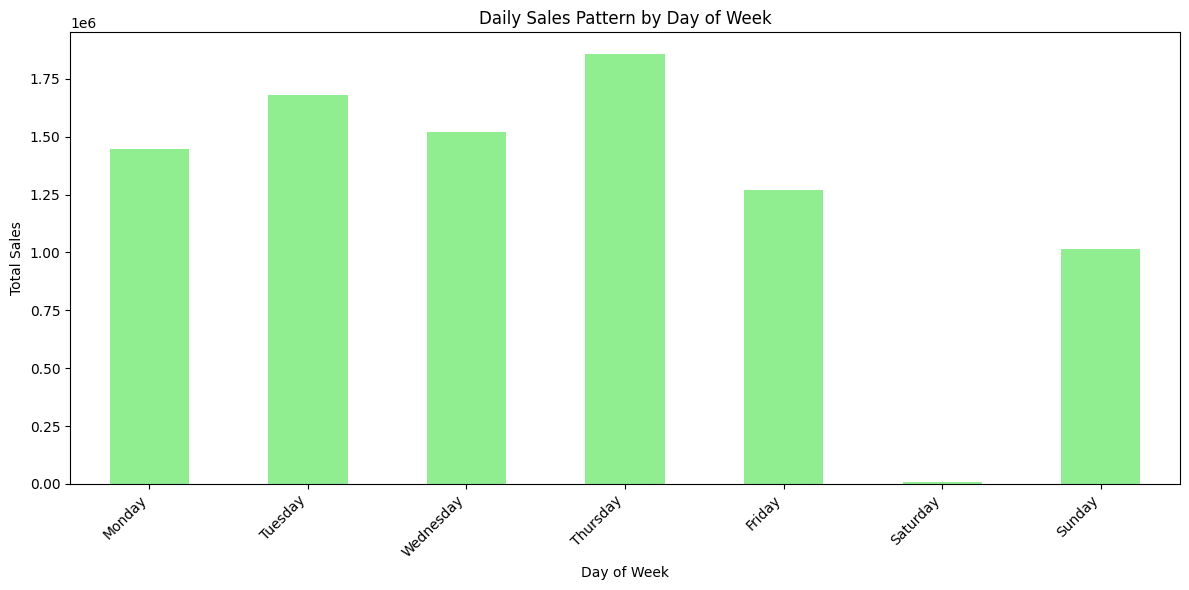

In [17]:
monthly_sales = df_sales.groupby('InvoiceYearMonth')['TotalPrice'].sum()
plt.figure(figsize=(10, 7))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


hourly_sales = df_sales.groupby('InvoiceHour')['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='bar', color='lightcoral')
plt.title('Hourly Sales Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df_sales.groupby('DayOfWeek')['TotalPrice'].sum().reindex(day_of_week_order)
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='bar', color='lightgreen')
plt.title('Daily Sales Pattern by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1) Top 10 Countries by Number of Orders:
Country
United Kingdom    17612
Germany             347
EIRE                316
France              236
Netherlands         135
Sweden               68
Spain                66
Belgium              52
Australia            40
Portugal             40
Name: Invoice, dtype: int64


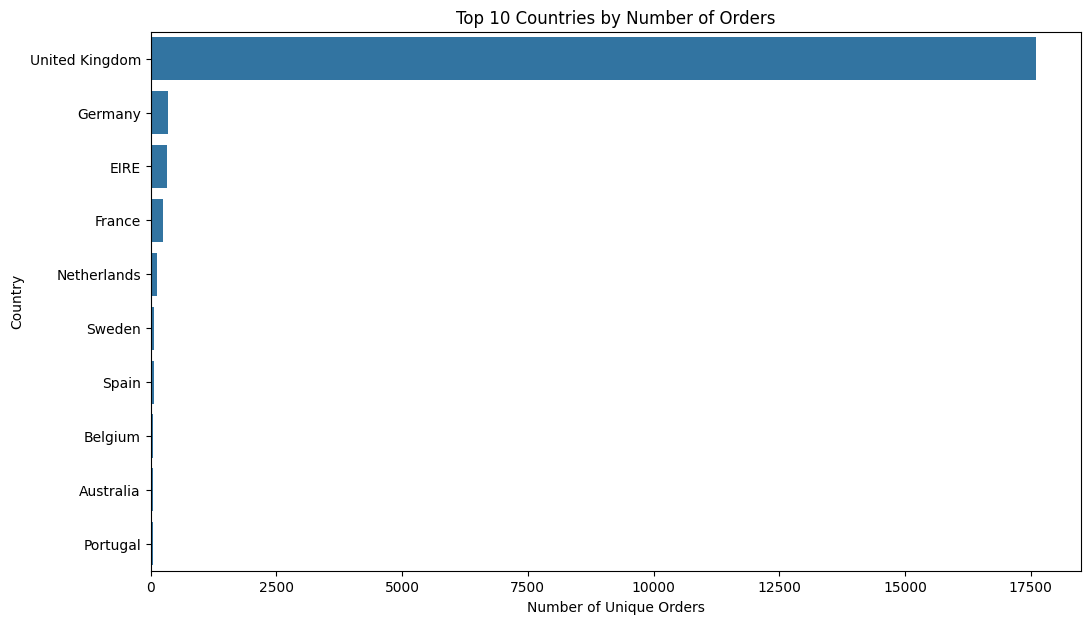

2) Top 10 Countries by Total Revenue:
Country
United Kingdom    7381644.433
EIRE               356041.860
Netherlands        268784.350
Germany            202025.391
France             146107.070
Sweden              53147.990
Denmark             50906.850
Spain               47568.650
Switzerland         43921.390
Australia           31446.800
Name: TotalPrice, dtype: float64


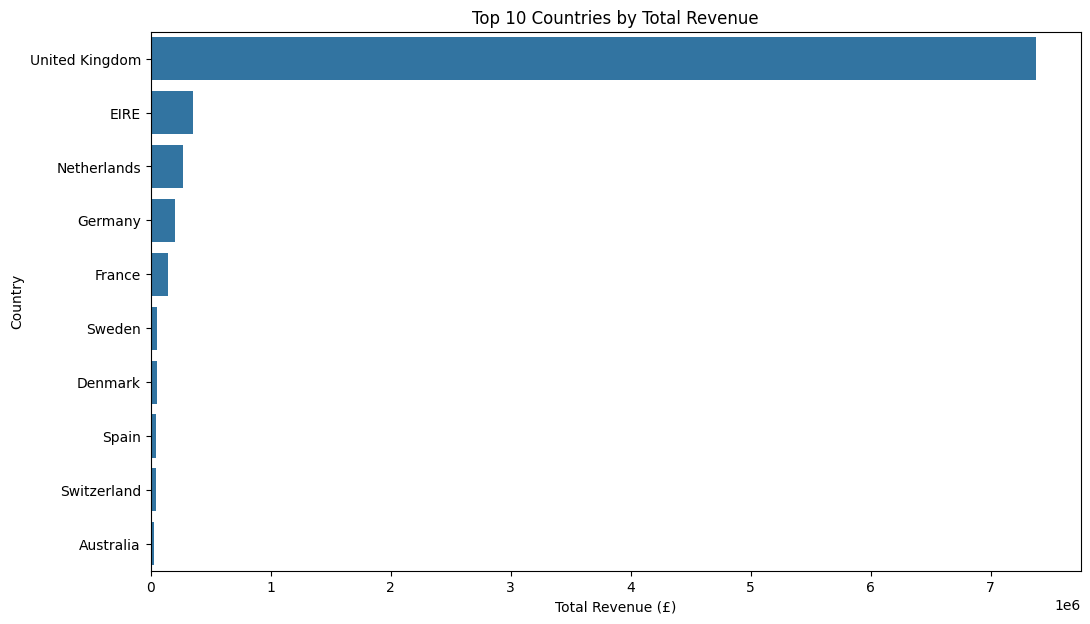

In [18]:
country_order_counts = df_sales.groupby('Country')['Invoice'].nunique().nlargest(10)
print("1) Top 10 Countries by Number of Orders:")
print(country_order_counts)

plt.figure(figsize=(12, 7))
sns.barplot(x=country_order_counts.values, y=country_order_counts.index)
plt.title('Top 10 Countries by Number of Orders')
plt.xlabel('Number of Unique Orders')
plt.ylabel('Country')
plt.show()


country_revenue = df_sales.groupby('Country')['TotalPrice'].sum().nlargest(10)
print("2) Top 10 Countries by Total Revenue:")
print(country_revenue)

plt.figure(figsize=(12, 7))
sns.barplot(x=country_revenue.values, y=country_revenue.index)
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Country')
plt.show()



RFM (Recency, Frequency, Monetary) Segmentation:

In [19]:
snapshot_date = df_sales['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm_df = df_sales.groupby('Customer ID').agg(
    Recency=('InvoiceDate', lambda date: (snapshot_date - date.max()).days),
    Frequency=('Invoice', 'nunique'),
    Monetary=('TotalPrice', 'sum')
)
print(rfm_df.head())

# smaller Recency = higher rank
# higher Frequency = higher rank
# higher Monetary = higher rank

# Recency (R_Score):
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'].rank(method='first', ascending=False), 4, labels=[1, 2, 3, 4])

# Frequency (F_Score):
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first', ascending=True), 4, labels=[1, 2, 3, 4])

# Monetary (M_Score):
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method='first', ascending=True), 4, labels=[1, 2, 3, 4])

# Combine RFM scores into an RFM Segment string
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

print(rfm_df.head())
print("\nDistribution of RFM Segments (Top 10):")
print(rfm_df['RFM_Segment'].value_counts().head(10))

             Recency  Frequency  Monetary
Customer ID                              
12346.0          165         11    372.86
12347.0            3          2   1323.32
12348.0           74          1    222.16
12349.0           43          3   2671.14
12351.0           11          1    300.93
             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment
Customer ID                                                                  
12346.0          165         11    372.86       1       4       2         142
12347.0            3          2   1323.32       4       2       3         423
12348.0           74          1    222.16       2       1       1         211
12349.0           43          3   2671.14       3       3       4         334
12351.0           11          1    300.93       4       1       1         411

Distribution of RFM Segments (Top 10):
RFM_Segment
444    452
111    340
344    218
121    170
333    168
233    160
433    141
211    141
112    138
222    12

Power BI

In [20]:
df_sales.to_csv('cleaned_online_retail_data.csv', index=False)
print("Cleaned data exported to 'cleaned_online_retail_data.csv'")

rfm_df.to_csv('rfm_customers.csv', index=True)
print("RFM data exported to 'rfm_customers.csv'")

Cleaned data exported to 'cleaned_online_retail_data.csv'
RFM data exported to 'rfm_customers.csv'
